In [6]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [3]:
# Read in the california housing data set
df = pd.read_csv('../Resources/California_Housing.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41


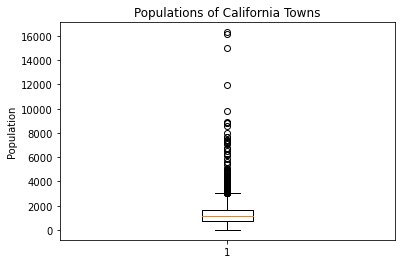

In [4]:
# Determine which measure of central tendency is most appropriate to describe the Population
pop = df.Population
fig1, ax1 = plt.subplots()
ax1.set_title('Populations of California Towns')
ax1.set_ylabel('Population')
ax1.boxplot(pop)
plt.show()

Because the Population data is heavily skewed, median or mode will more appropriately describe this distribution.

In [10]:
mean_numpy = np.mean(pop)
print(f"The mean population of California Counties is {mean_numpy}")

median_numpy = np.median(pop)
print(f"The median population of California Counties is {median_numpy}")

mode_scipy = sts.mode(pop)
print(f"The mode population of California Counties is {mode_scipy[0]}")

The mean population of California Counties is 1387.9633333333334
The median population of California Counties is 1152.5
The mode population of California Counties is [1128.]


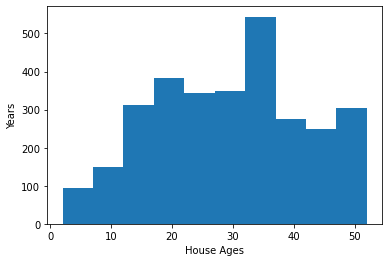

The null hypothesis can be rejected: the data is not normally distributed (p = 1.2936606553611553e-59).


In [20]:
# Determine if the house age in California is considered normally distributed
age = df.HouseAge
plt.hist(age)
plt.xlabel('House Ages')
plt.ylabel('Years')
plt.show()
k2, p = sts.normaltest(age)
if p < 0.05:
    print(f"The null hypothesis can be rejected: the data is not normally distributed (p = {p}).")
else:
    print(f"The null hypothesis cannot be rejected: the data may be normally distributed (p = {p}).")

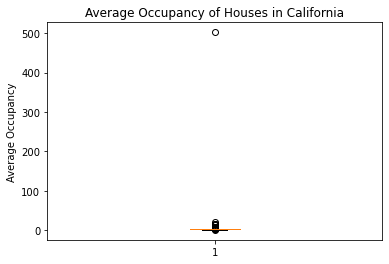

In [21]:
# Determine if there are any potential outliers in the average occupancy in California
occ = df.AveOccup
fig1, ax1 = plt.subplots()
ax1.set_title('Average Occupancy of Houses in California')
ax1.set_ylabel('Average Occupancy')
ax1.boxplot(occ)
plt.show()

In [22]:
quartiles = occ.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 2.4250909806040477
The upper quartile of temperatures is: 3.297459274342836
The interquartile range of temperatures is: 0.8723682937387882
The the median of temperatures is: 2.81970199317512 
Values below 1.1165385399958654 could be outliers.
Values above 4.606011714951018 could be outliers.


In [24]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?
outliers = df.loc[(df.AveOccup > 4.61) | (df.AveOccup < 1.12)]
outliers.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41
42,3.6429,26.0,5.836111,1.083333,2171.0,6.030556,38.57,-122.44
72,2.7759,30.0,4.167619,1.059048,2727.0,5.194286,33.83,-118.08
143,3.0509,30.0,5.598131,1.172897,1019.0,4.761682,33.94,-117.40
168,2.6300,29.0,3.496212,1.003788,2576.0,4.878788,33.97,-118.14


In [28]:
income_max = outliers.MedInc.max()
income_min = outliers.MedInc.min()
print(f"In homes with outlying occupancy, the highest median income is ${round(income_max*1000,2)} and the lowest median income is ${round(income_min*1000, 2)}.")

In homes with outlying occupancy, the highest median income is $15000.1 and the lowest median income is $716.0.


The yellow dot around LA could be an outlier of median income.


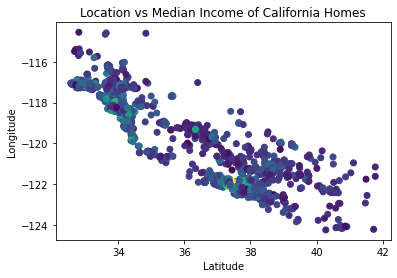

In [35]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.
plt.scatter(x = df.Latitude, y = df.Longitude, c = df.MedInc)
plt.title("Location vs Median Income of California Homes")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
print("The yellow dot around LA could be an outlier of median income.")